# Bag of words and Word vectorization

"Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length."
[skicit_learn.text_feature_extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

This notebook shows basic examples for bag of word representation and word vecorization.

example_1: bag of word representation with scikit-learn

example_2: word vectors with word2vec algorith used in spaCy

example_3: word vectors with keras tokenizator

# Bag of words

in this exeample the class ``CountVectorzier`` creates tokenized and counted outputs of a given text.
More about featrue extraction with scikit can be found here: [scikit-learn.FeatureExtraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# per default, the CountVectorzier model can tokenize and count 
# word occourrences with at least 2 letters. 
# when parameters are specified, the model can be adjusted for further features.
# class description: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer
vectorizer = CountVectorizer();

doc = [
       'Federer is one of the greatest tennis players of all time.',
       'Federer has won twenty grand slam titles to date.'
       ]
#
X= vectorizer.fit_transform(doc)
#
# vectorizer output
X

<2x18 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [41]:
# show the found unique words in the 2 sentences (automatically ordered)
vectorizer.get_feature_names()

['all',
 'date',
 'federer',
 'grand',
 'greatest',
 'has',
 'is',
 'of',
 'one',
 'players',
 'slam',
 'tennis',
 'the',
 'time',
 'titles',
 'to',
 'twenty',
 'won']

In [42]:
# show the vector according to the features
X.toarray()

array([[1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]])

## PCA scatterplot visualizing word vectors of selected food and beverages

In [23]:
""" source: 
https://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html
"""
import matplotlib.pyplot as plt
import numpy as np
# set a default style for the plot
plt.style.use('bmh')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [68]:
#get glove data
!wget http://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.6B.zip

--2021-02-25 14:44:50--  http://downloads.cs.stanford.edu/nlp/data/wordvecs/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182753 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  1.79MB/s    in 6m 52s  

2021-02-25 14:51:43 (1.99 MB/s) - ‘glove.6B.zip’ saved [862182753/862182753]



In [70]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
  inflating: glove.6B.50d.txt        


In [2]:
glove_file = '/content/glove.6B.100d.txt'
word2vec_glove_file = get_tmpfile('glove.6B.100d.word2vec.txt')
glove2word2vec(glove_file, word2vec_glove_file)

(400001, 100)

In [3]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [53]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA(n_components=2).fit_transform(word_vectors)[:,:2]    

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    plt.plot([-3, 3], [3, -3], ls="--", c="r")
    # add names
    for word, (x,y) in zip(words, twodim):
      plt.text(x+0.05, y+0.05, word)


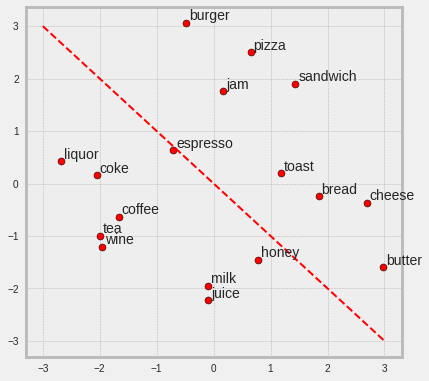

In [54]:
#
ingredients = [
               'bread', 'butter', 'burger', 'cheese','coffee', 'coke',
               'espresso','honey', 'jam','juice','liquor','milk', 'pizza',
               'sandwich', 'tea', 'toast','wine'
               ]
#
display_pca_scatterplot(model, ingredients)

# SpaCy

to get the word vectors in a given text, it is important to load a large pipeline package as spaCy's small pipeline packages installed by default, don't ship with word vectors.


In [ ]:
import spacy

spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
nlp = spacy.load("en_core_web_lg")
tokens = nlp("dog cat banana afskfsd")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 7.0336733 False
cat True 6.6808186 False
banana True 6.700014 False
afskfsd False 0.0 True


In [ ]:
doc1 = nlp("I like salty fries and hamburgers.")
doc2 = nlp("Fast food tastes very good.")

# Similarity of two documents
print(doc1, "<->", doc2, doc1.similarity(doc2))
# Similarity of tokens and spans
french_fries = doc1[2:4]
burgers = doc1[5]
print(french_fries, "<->", burgers, french_fries.similarity(burgers))

I like salty fries and hamburgers. <-> Fast food tastes very good. 0.7687607012190486
salty fries <-> hamburgers 0.6949788


# KERAS

As an important task in preprocessing data for further machine learning processes, ``TextVectorization`` holds an index mapping words or tokens to integer indices.

sourec: [keras.getting_started](https://keras.io/getting_started/intro_to_keras_for_engineers/#data-preprocessing-with-keras)

##### example 1:

turning strings into sequences of integer word indices

In [ ]:
import numpy as np
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Example training data, of dtype `string`.
training_data = np.array([["This is the 1st sample."], ["And here's the 2nd sample."]])

# Create a TextVectorization layer instance. It can be configured to either
# return integer token indices, or a dense token representation (e.g. multi-hot
# or TF-IDF). The text standardization and text splitting algorithms are fully
# configurable.
vectorizer = TextVectorization(output_mode="int")

# Calling `adapt` on an array or dataset makes the layer generate a vocabulary
# index for the data, which can then be reused when seeing new data.
vectorizer.adapt(training_data)

# After calling adapt, the layer is able to encode any n-gram it has seen before
# in the `adapt()` data. Unknown n-grams are encoded via an "out-of-vocabulary"
# token.
integer_data = vectorizer(training_data)
print(integer_data)

tf.Tensor(
[[4 5 2 9 3]
 [7 6 2 8 3]], shape=(2, 5), dtype=int64)


##### example 2: 

turning strings into sequences of one-hot encoded bigrams

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Example training data, of dtype `string`.
training_data = np.array([["This is the 1st sample."], ["And here's the 2nd sample."]])

# Create a TextVectorization layer instance. It can be configured to either
# return integer token indices, or a dense token representation (e.g. multi-hot
# or TF-IDF). The text standardization and text splitting algorithms are fully
# configurable.
vectorizer = TextVectorization(output_mode="binary", ngrams=2)

# Calling `adapt` on an array or dataset makes the layer generate a vocabulary
# index for the data, which can then be reused when seeing new data.
vectorizer.adapt(training_data)

# After calling adapt, the layer is able to encode any n-gram it has seen before
# in the `adapt()` data. Unknown n-grams are encoded via an "out-of-vocabulary"
# token.
integer_data = vectorizer(training_data)
print(integer_data)

tf.Tensor(
[[0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]], shape=(2, 17), dtype=float32)
